<a href="https://colab.research.google.com/github/vu-duy-tung/mino-playground/blob/main/SoICT_Hackathon_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import os
import librosa
import scipy
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import json
from IPython.display import Audio
from google.colab import drive

## Data Preparation

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!ls /content/drive/MyDrive/SLU_SoICT_Hackathon_2023


public_test  Train  train.jsonl


In [30]:
test_path = '/content/drive/MyDrive/SLU_SoICT_Hackathon_2023/public_test/'
train_path = '/content/drive/MyDrive/SLU_SoICT_Hackathon_2023/Train/'
test_audio_lst = os.listdir(test_path)
train_audio_lst = os.listdir(train_path)
print("Number of audio files in training set:", len(train_audio_lst))
print("Number of audio files in test set:", len(test_audio_lst))
test_audio_lst[:5]

Number of audio files in training set: 4271
Number of audio files in test set: 1299


['fvD9cyf2tNDn32wrCLOwQ1f.wav',
 'LB8SexRxwkYkk6R9F165WwL.wav',
 'tsMXJYeC5FW6hzx9Nw9nKSE.wav',
 '7nHVrtG4yFSJgqxE4GJYg2p.wav',
 'KA5anF39674ImeLufWznw2O.wav']

In [5]:
samples, sample_rate = librosa.load(test_path + test_audio_lst[0], sr=16000)

### Try to run an audio file

In [25]:
# Specify the path to your WAV file
audio_file = train_path + train_audio_lst[0]  # Replace with the path to your WAV file

# Open the WAV file and obtain its properties, including duration
with sf.SoundFile(audio_file, 'r') as file:
    duration = len(file) / file.samplerate  # Calculate duration in seconds

print(f"Duration of {audio_file}: {duration:.2f} seconds")
Audio(audio_file)

Duration of /content/drive/MyDrive/SLU_SoICT_Hackathon_2023/Train/6485c87f8503517cfae4c9a2.wav: 4.50 seconds


### Range of durations of audio files in training set

In [28]:
Max = 0
Min = 10000000000
durations = []
for audio_file in train_audio_lst:
  audio_file = train_path + audio_file
  with sf.SoundFile(audio_file, 'r') as file:
    duration = len(file) / file.samplerate
    duration.append(duration)
    Max = max(Max, duration)
    Min = min(Min, duration)

print("Range of duration is:", Min, Max)
plt.his(np.array(durations))

Range of duration is: 0.84 14.22


### Visualize audio signal in time-series domain



Audio signal: [ 6.8429654e-07  2.8669655e-07 -1.1109976e-06 ...  1.0430652e-03
  7.1281550e-04  4.3396308e-04]
(99225,)
Sample rate: 22050


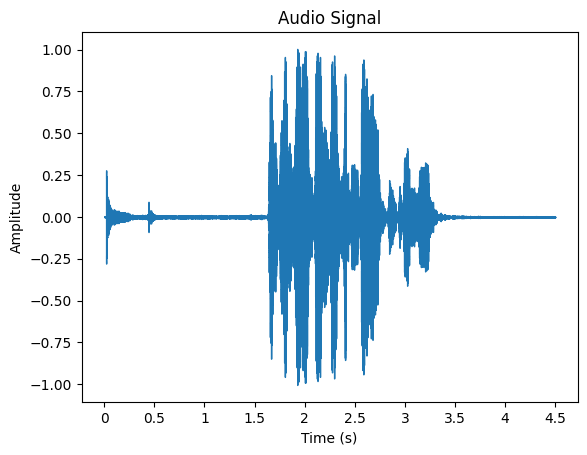

In [19]:
# Load the audio file and obtain the signal and sample rate
audio_file = train_path + train_audio_lst[0]
y, sr = librosa.load(audio_file)
print("Audio signal:", y)
print(y.shape)

# Plot the audio signal
print("Sample rate:", sr)
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Audio Signal")
plt.show()

## Process train.jsonl file

In [59]:
with open('/content/drive/MyDrive/SLU_SoICT_Hackathon_2023/train.jsonl', 'r') as json_file:
    json_lst = list(json_file)

audio_info_lst = []
audio_ids_have_info = []

for json_str in json_lst:
    result = json.loads(json_str) #dict
    audio_info_lst.append(result)

for audio in audio_info_lst:
  audio_ids_have_info.append(audio['file'])

print(len(audio_ids_have_info))

print("Number of audio files that have info:", len(audio_info_lst), '\n')

print(audio_info_lst[0].keys())
print(audio_info_lst[0])

## Check if there is duplicate information --> No
# check = []
# for tmp in audio_info_lst:
#   if tmp['file'] not in check:
#     check.append(tmp['file'])
# print(len(check))

Count = 0
for audio_ids in audio_ids_have_info:
  if audio_ids not in train_audio_lst and audio_ids not in test_audio_lst:
    Count += 1
print("\nNumber of text information that do not have original audio file:", Count, '\n')

Count = 0
for audio_file in list(set(train_audio_lst + test_audio_lst)):
  if audio_file not in audio_ids_have_info:
    Count += 1
print("Number of audio files that do not have text information:", Count, '\n')

Count = 0
for audio_file in list(set(train_audio_lst)):
  if audio_file not in audio_ids_have_info:
    Count += 1
print("Number of audio files that do not have text information in training set:", Count, '\n')

Count = 0
for audio_file in list(set(test_audio_lst)):
  if audio_file not in audio_ids_have_info:
    Count += 1
print("Number of audio files that do not have text information in test set:", Count, '\n')

# print(len(list(set(train_audio_lst + test_audio_lst))), len(train_audio_lst), len(test_audio_lst)) --> No overlap files between training set and test set

7490
Number of audio files that have info: 7490 

dict_keys(['id', 'sentence', 'intent', 'sentence_annotation', 'entities', 'file'])
{'id': '64831a87d9f56915da41ef35', 'sentence': 'cái đèn tranh trong nhà giữ đồ Trường Sa có còn không ấy nhờ đi kiểm tra ngay nhé', 'intent': 'Kiểm tra tình trạng thiết bị', 'sentence_annotation': 'cái [ device : đèn tranh ] trong [ location : nhà giữ đồ Trường Sa ] có còn không ấy nhờ đi [ command : kiểm tra ] ngay nhé', 'entities': [{'type': 'device', 'filler': 'đèn tranh'}, {'type': 'location', 'filler': 'nhà giữ đồ Trường Sa'}, {'type': 'command', 'filler': 'kiểm tra'}], 'file': '64831a87d9f56915da41ef35.wav'}

Number of text information that do not have original audio file: 3219 

Number of audio files that do not have text information: 1299 

Number of audio files that do not have text information in training set: 0 

Number of audio files that do not have text information in test set: 1299 

